Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


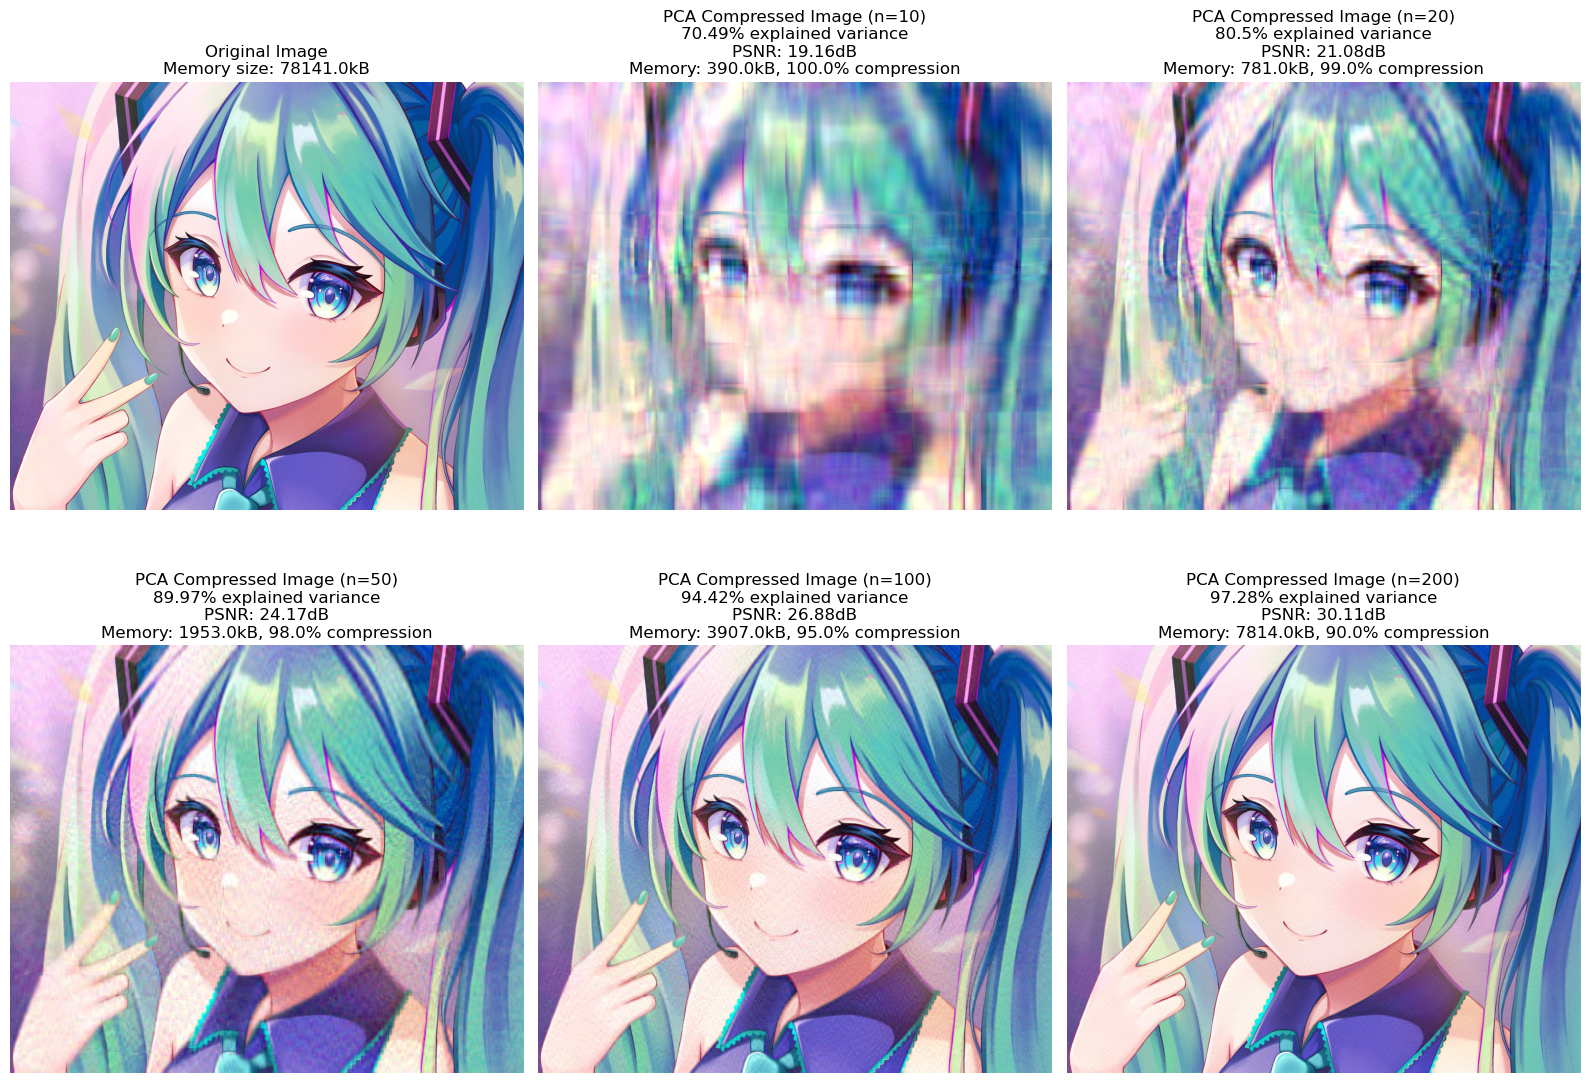

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image

def psnr(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    max_val = np.max(original)
    return 20 * np.log10(max_val / np.sqrt(mse))

# Load your own image
image = np.array(Image.open("miku.jpg")) / 255.0

# Separate color channels
red_channel = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 2]

# Calculate memory size of original data
original_red_size_kb = red_channel.nbytes / 1024  # Size in kilobytes
original_green_size_kb = green_channel.nbytes / 1024  # Size in kilobytes
original_blue_size_kb = blue_channel.nbytes / 1024  # Size in kilobytes
original_total_kb = np.round(original_red_size_kb + original_green_size_kb + original_blue_size_kb)

# Create a subplot grid
num_rows = 2
num_cols = 3 
plt.figure(figsize=(16, 6*num_rows))

# Display original image
plt.subplot(num_rows, num_cols, 1)
plt.imshow(image)
plt.title(f"Original Image\nMemory size: {original_total_kb}kB")
plt.axis('off')

# Define a range of n_components values
n_components_range = [10, 20, 50, 100, 200] 

for i, n_components in enumerate(n_components_range, start=1):
  # Perform PCA on each color channel
  pca_red = PCA(n_components=n_components)
  pca_green = PCA(n_components=n_components)
  pca_blue = PCA(n_components=n_components)

  # Compress the data
  compressed_red = pca_red.fit_transform(red_channel)
  compressed_green = pca_green.fit_transform(green_channel)
  compressed_blue = pca_blue.fit_transform(blue_channel)

  # Calculate memory size of compressed data
  compressed_red_size_kb = compressed_red.nbytes / 1024  # Size in kilobytes
  compressed_green_size_kb = compressed_green.nbytes / 1024  # Size in kilobytes
  compressed_blue_size_kb = compressed_blue.nbytes / 1024  # Size in kilobytes
  compressed_total_kb = np.floor(compressed_red_size_kb + compressed_green_size_kb + compressed_blue_size_kb)

  compressed_percent = np.round((original_total_kb - compressed_total_kb) / original_total_kb * 100)

  # Reconstruct the compressed data
  reconstructed_red = pca_red.inverse_transform(compressed_red)
  reconstructed_green = pca_green.inverse_transform(compressed_green)
  reconstructed_blue = pca_blue.inverse_transform(compressed_blue)

  # Combine the channels back into an RGB image
  reconstructed_image = np.stack((reconstructed_red, reconstructed_green, reconstructed_blue), axis=-1)

  # Calculate PSNR
  psnr_val = psnr(image, reconstructed_image)

  # Calculate the percentage of variance explained
  explained_var_red = np.sum(pca_red.explained_variance_ratio_) * 100
  explained_var_green = np.sum(pca_green.explained_variance_ratio_) * 100
  explained_var_blue = np.sum(pca_blue.explained_variance_ratio_) * 100
  explained_var_avg = np.round((explained_var_red + explained_var_green + explained_var_blue) / 3, 2)

  # Display compressed image
  plt.subplot(num_rows, num_cols, i + 1)
  plt.imshow(reconstructed_image)
  plt.title(f"PCA Compressed Image (n={n_components})\n{explained_var_avg}% explained variance\nPSNR: {psnr_val:.2f}dB\nMemory: {compressed_total_kb}kB, {compressed_percent}% compression")
  plt.axis('off')

plt.tight_layout()
plt.show()